In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
M = pd.read_csv("train (1).csv")
test_set = pd.read_csv("test (2).csv")

In [3]:
M.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [4]:
print(M.shape) # Verifying dimensions

(14396, 18)


In [5]:
print(test_set.shape) # Verifying dimensions

(3600, 17)


In [6]:
M.info() # The are columns with nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [7]:
Id = M.Id
M = M.drop("Id",axis=1)

In [8]:
m = M.isna() # True for NAN, False for anything else
print(np.sum(m,axis=0)) # SUMS all trues to find the amount of nulls in each column

Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64


In [9]:
# For now I will remove all nan rows 
M.dropna(inplace=True)

In [10]:
#duplicates?
M.duplicated().sum()

np.int64(0)

In [11]:
M = M.drop_duplicates()

In [12]:
M.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9.412000e+03,9412.000000,9412.000000
mean,43.168721,0.524349,0.669794,5.972907,-8.211778,0.625797,0.071122,0.239737,0.179897,0.194727,0.468743,123.063930,2.124931e+05,3.915002,6.629941
std,16.566433,0.165417,0.243421,3.167315,4.267179,0.483942,0.068123,0.319015,0.304346,0.159714,0.244040,29.449393,1.153708e+05,0.377904,3.246277
min,1.000000,0.064400,0.001240,1.000000,-36.214000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,32.000000,0.413000,0.510750,3.000000,-10.005500,0.000000,0.034600,0.001820,0.000093,0.096700,0.270000,100.012750,1.752262e+05,4.000000,5.000000
50%,43.000000,0.526000,0.716000,6.000000,-7.309000,1.000000,0.046100,0.056850,0.004310,0.127000,0.458000,120.061500,2.174910e+05,4.000000,8.000000
75%,54.000000,0.636000,0.876250,9.000000,-5.311000,1.000000,0.076500,0.419000,0.211000,0.253250,0.658000,141.907000,2.633570e+05,4.000000,10.000000
max,98.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.935000,0.996000,0.996000,0.992000,0.980000,217.416000,1.477187e+06,5.000000,10.000000


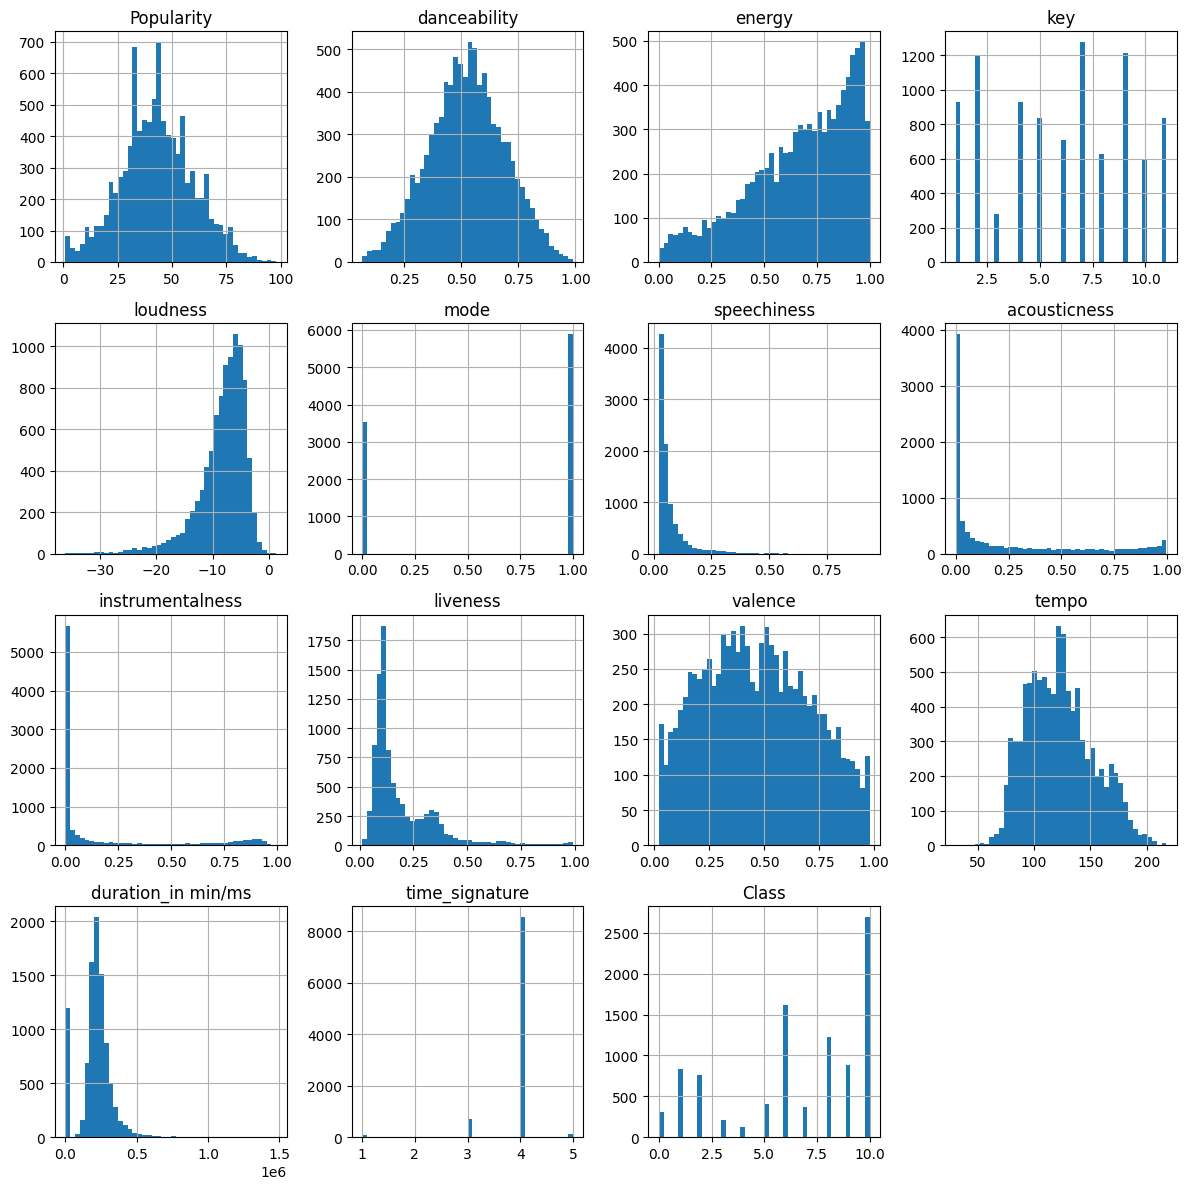

<Figure size 640x480 with 0 Axes>

In [13]:
# checking distributions
M.hist(figsize=(12,12), bins=44)
plt.tight_layout()
plt.show()
plt.clf()

In [ ]:
# What do you understand from this? what do you do with skewed data?

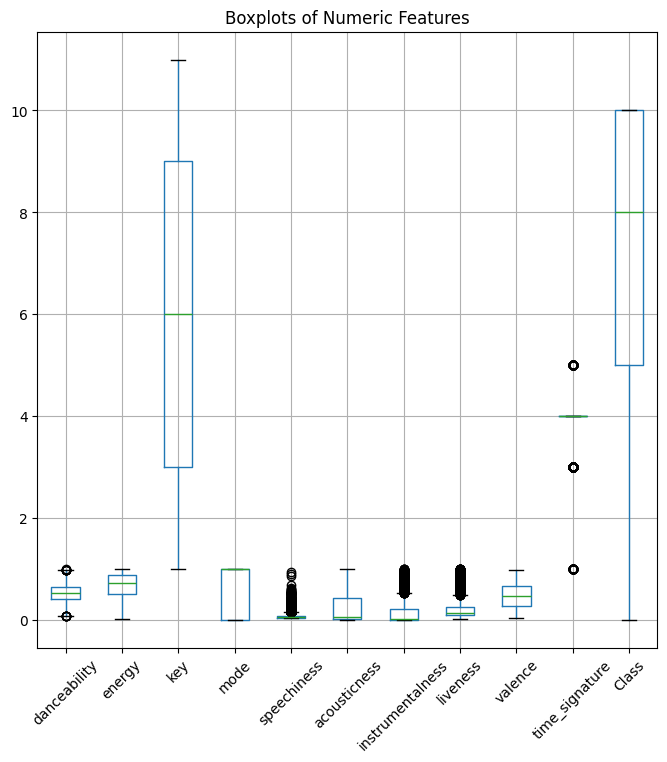

<Figure size 640x480 with 0 Axes>

In [14]:
# checking for outliers using boxplots
M.drop(["duration_in min/ms","Popularity","tempo",'loudness'],axis=1).boxplot(figsize=(8,8))
plt.xticks(rotation=45)
plt.title('Boxplots of Numeric Features')
plt.show()
plt.clf()

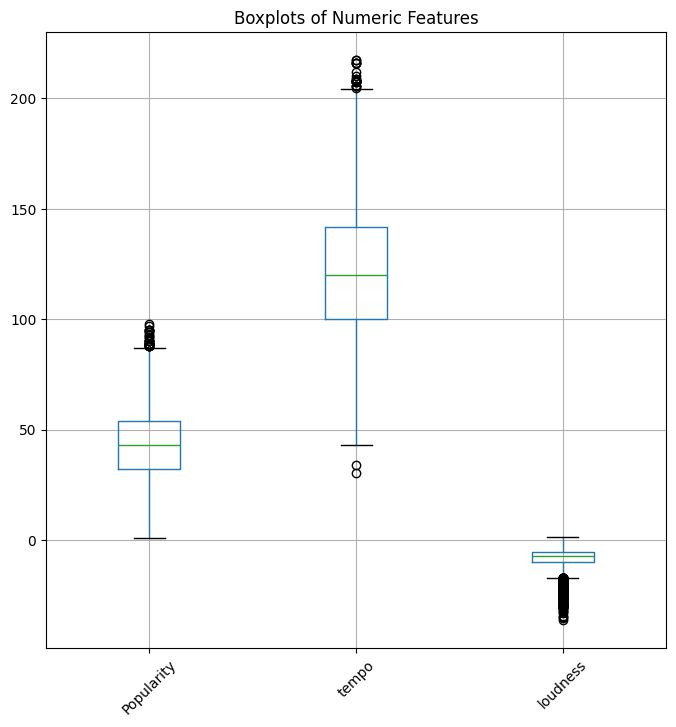

<Figure size 640x480 with 0 Axes>

In [15]:
M[["Popularity","tempo",'loudness']].boxplot(figsize=(8,8))
plt.xticks(rotation=45)
plt.title('Boxplots of Numeric Features')
plt.show()
plt.clf()

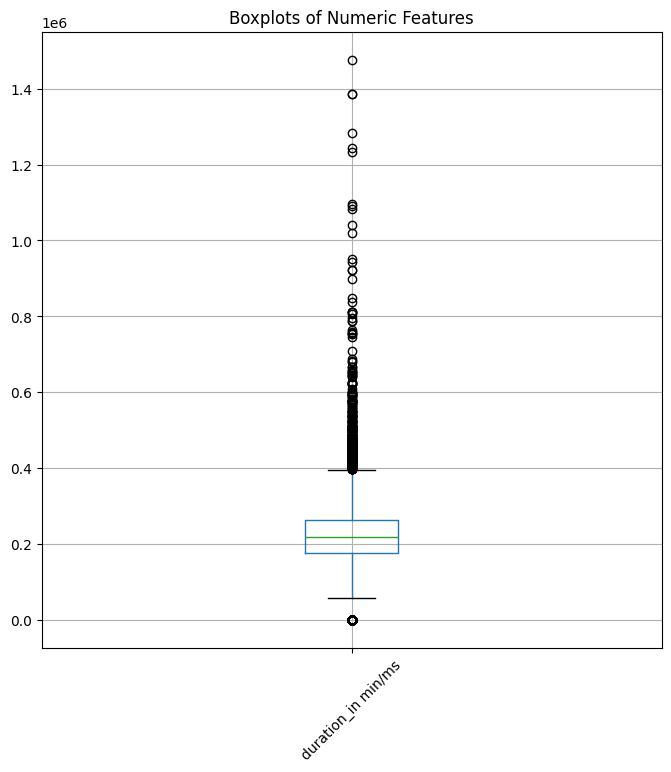

<Figure size 640x480 with 0 Axes>

In [17]:
M[["duration_in min/ms"]].boxplot(figsize=(8,8))
plt.xticks(rotation=45)
plt.title('Boxplots of Numeric Features')
plt.show()
plt.clf()

In [ ]:
# Capping outliers? 

BASIC EDA - Correlations between features (num) and checking mutual information to remove multicollinearity 

            Deriving new features and checking correlations and such
            
            Using Wrapper Methods to find the best set of features after model evaluation? (after small revision)

            Applying regulariztion during model fitting? (after small revision)

            Dealing with the categorical features (encoding)

Machine Learning section

            Classification - Checking cross-validation for base estimators (Log Reg) (Decision Trees) and then apply bagging or boosting as ensemble methods?

                            using random forest , Gradient Boosting and XGboost algo

                            make the submission before saturday